### Actividad 4: Comprensión de los datos
Librerias

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.stats import skew

### Leer la base de datos

In [4]:
data = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### ¿Qué variables presentan datos atípicos?
Crear el boxplot utilizando Seaborn

In [31]:
num=data.loc[:, data.columns!='Id']
numeric=num.select_dtypes(np.number)
print(numeric.columns)
numeric.dtypes

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [45]:
# Código Alex
from scipy.stats import norm

S_Price = data[['SalePrice']]
print(type(S_Price))

# Crear una matriz de subgráficos con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Agregar un boxplot a cada subgráfico utilizando la función boxplot de scipy
# La función boxplot de scipy no tiene todos los parámetros de personalización que tiene matplotlib
# Por lo tanto, utilizaremos matplotlib solo para personalización adicional
for ax, data, title in zip(axes, [S_Price], ['Sale_Price']):
    ax.boxplot(data)
    ax.set_title(title)

# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar los subgráficos
plt.show()

ModuleNotFoundError: No module named 'scipy'

### ¿En qué variables identifica un tipo de sesgo?
Creación del histograma

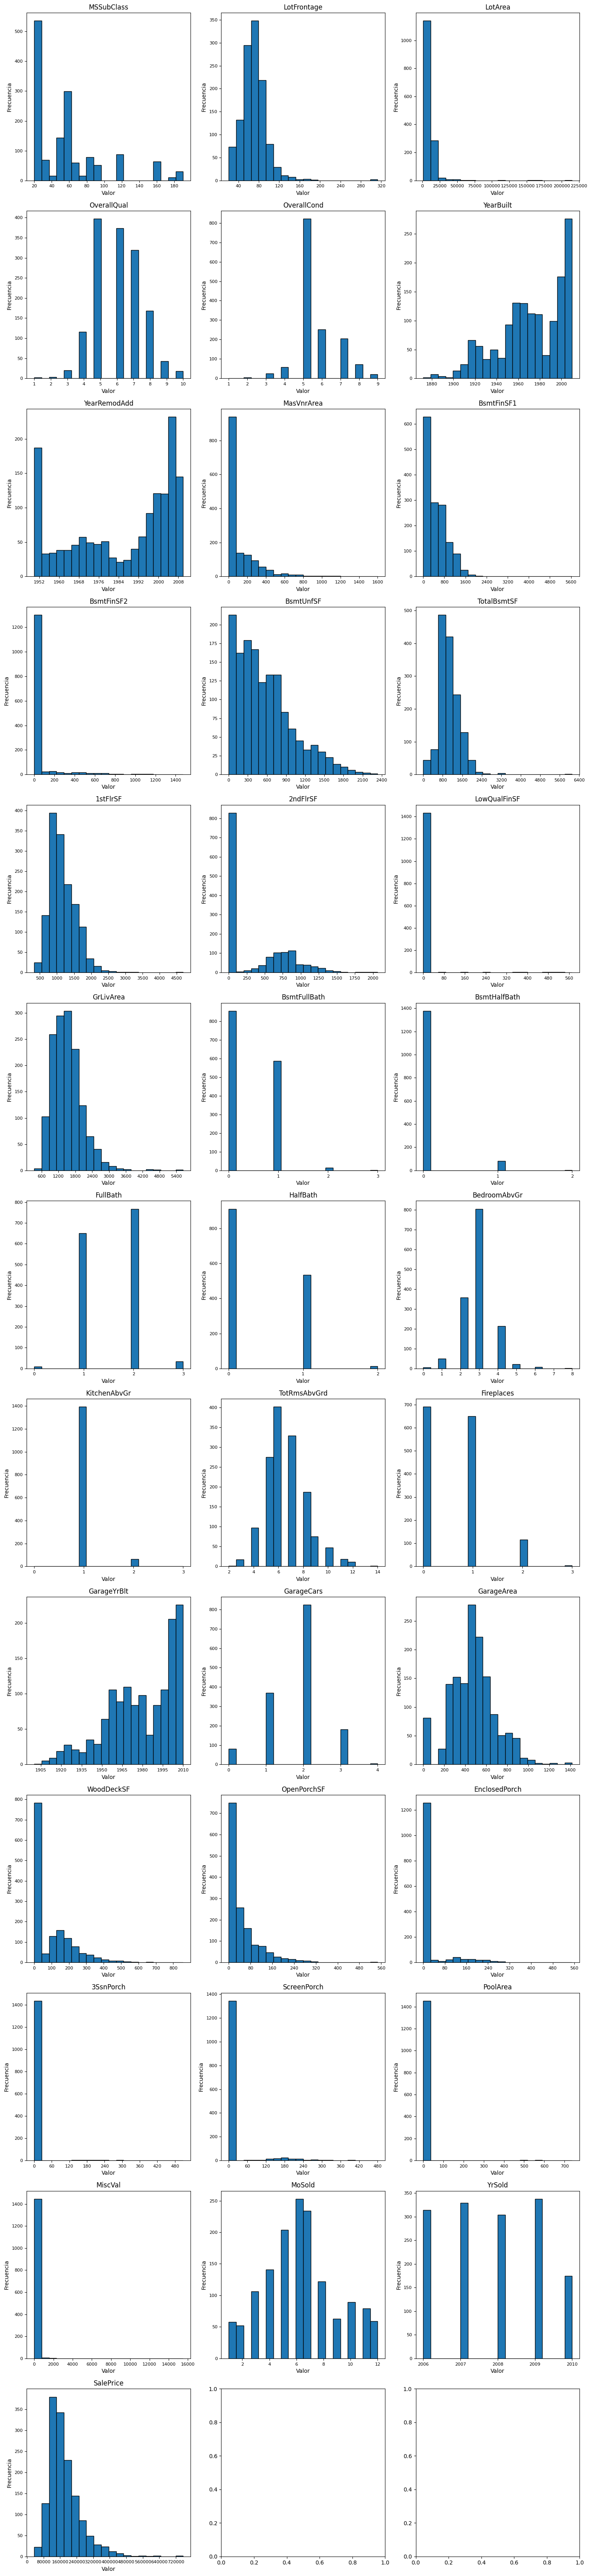

In [46]:
num_columns = len(numeric.columns)
num_rows = (num_columns + 2) // 3 
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(numeric.columns):
    ax = axes[i]
    ax.hist(data[column], bins=20, edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) 
    

plt.tight_layout()
plt.show()


In [57]:
asimetria = numeric.apply(skew)

umbral_sesgo = 0.5

columnas_con_sesgo_asimetria = asimetria[abs(asimetria) > umbral_sesgo]
columnas_sin_sesgo = asimetria[(abs(asimetria) <= umbral_sesgo)]

print("Columnas con sesgo en asimetría:")
print(columnas_con_sesgo_asimetria.index.tolist())

print("\nColumnas sin sesgo:")
print(columnas_sin_sesgo.index.tolist())

Columnas con sesgo en asimetría:
['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

Columnas sin sesgo:
['OverallQual', 'FullBath', 'BedroomAbvGr', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold']


## ¿Sigue una distribución normal cada variable numérica?
### Prueba de Anderson Darling

In [ ]:
# num = data.loc[:, data.columns!='MSSubClass']
# numeric = num.select_dtypes(np.number)

In [ ]:
var = var.values.tolist()

In [ ]:
from scipy.stats import anderson

result = anderson(var, dist='norm')

print("Estadístico A^2:", result.statistic)
print("Valores críticos:", result.critical_values)
print("Niveles de significancia:", result.significance_level)

# Comprobar si rechazamos la hipótesis nula basada en el estadístico A^2 y los valores críticos
alpha = 0.05  # Nivel de significancia
if result.statistic.any() > result.critical_values[2]:  # Utilizamos el valor crítico para alfa = 0.05
    print("Rechazar la hipótesis nula: Los datos no siguen una distribución normal.")
else:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución normal.")


Estadístico A^2: [nan nan nan ... nan nan nan]
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Rechazar la hipótesis nula: Los datos no siguen una distribución normal.
